# TP Final - Spotify

Juan E. Azar - Leandro Leon - Rodrigo Pazos 

# Analisis de Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./data/data_playlist.csv")
df.head(5)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


## Analisis exploratorio inicial

In [3]:
df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


In [4]:
df._get_numeric_data().columns

Index(['acousticness', 'danceability', 'duration', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'label'],
      dtype='object')

In [5]:
df.columns.drop(df._get_numeric_data().columns)

Index([], dtype='object')

En primer lugar se determino que no hay columnas no numericas. Sobre las columnas numericas se determino informacion estadistica basica de cada una.

In [6]:
from pycaret.classification import *

clf = setup(data=df, target='label', session_id=13)
best_model = compare_models()
final_model = finalize_model(best_model)

,Description,Value
0,Session id,13
1,Target,label
2,Target type,Binary
3,Original data shape,"(750, 14)"
4,Transformed data shape,"(750, 14)"
5,Transformed train set shape,"(525, 14)"
6,Transformed test set shape,"(225, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8459,0.9215,0.8799,0.8694,0.8726,0.6768,0.6825,0.0400
lightgbm,Light Gradient Boosting Machine,0.8343,0.8988,0.8797,0.8536,0.8644,0.6502,0.6578,0.0210
rf,Random Forest Classifier,0.8286,0.9109,0.8704,0.8524,0.8592,0.6390,0.6458,0.0380
gbc,Gradient Boosting Classifier,0.8209,0.8920,0.8702,0.8436,0.8542,0.6205,0.6276,0.0240
ridge,Ridge Classifier,0.7964,0.0000,0.8260,0.8387,0.8302,0.5742,0.5796,0.0090
lda,Linear Discriminant Analysis,0.7868,0.8732,0.8291,0.8250,0.8245,0.5505,0.5584,0.0100
ada,Ada Boost Classifier,0.7752,0.8406,0.8132,0.8181,0.8105,0.5313,0.5429,0.0290
dt,Decision Tree Classifier,0.7505,0.7423,0.7815,0.8032,0.7894,0.4818,0.4868,0.0110
qda,Quadratic Discriminant Analysis,0.7504,0.8482,0.6989,0.8615,0.7688,0.5034,0.5186,0.0100
lr,Logistic Regression,0.6917,0.7387,0.8418,0.7256,0.7698,0.3026,0.3010,0.1850


### Variables

#### Descripcion de variables

#### Input

- *acousticness*: Medida de la acústica de la canción. Valores cercanos a 1 indican alta acústica.
- *danceability*: Medida de lo adecuada que es una canción para bailar. Valores cercanos a 1 indican alta aptitud para el baile.
- *duration*: Duración de la canción en milisegundos.
- *energy*: Medida de la energía y la intensidad de la canción. Valores altos indican mayor energía.
- *instrumentalness*: Indica si una canción no contiene voces. Valores cercanos a 1 indican alta instrumentalidad.
- *key*: Tonalidad principal de la canción, representada por un número.
- *liveness*: Medida de la presencia de una audiencia en la grabación. Valores cercanos a 1 indican alta presencia de audiencia.
- *loudness*: Volumen general de la canción en decibelios (dB). Valores negativos indican mayor volumen.
- *mode*: Indica si una canción es mayor (1) o menor (0) en tonalidad.
- *speechiness*: Medida de la presencia de palabras habladas en la canción. Valores cercanos a 1 indican alta presencia de palabras habladas.
- *tempo*: Tempo de la canción en beats por minuto (BPM).
- *valence*: Medida de la positividad o negatividad emocional de la canción. Valores cercanos a 1 indican alta positividad.
- *time_signature*: Indica la firma de tiempo de la canción, que es el número de pulsaciones o beats por cada medida musical. Por ejemplo, un valor de 4 significa que hay 4 beats por cada medida.

#### Output

- *label*: Indica si el usuario al que se esta estudiando le gusta o no la cancion

### Agrupacion de variables

Estas variables se pueden ordenar de la siguiente manera:

Relativas
- acousticness
- danceability
- energy
- instrumentalness
- valence
- liveness
- speechiness

Categoricas
- key
- mode
- energy
- time_signature

Nominales
- loudness
- duration
- tempo

label tambien es categorica y es la variable de salida

#### Relativas

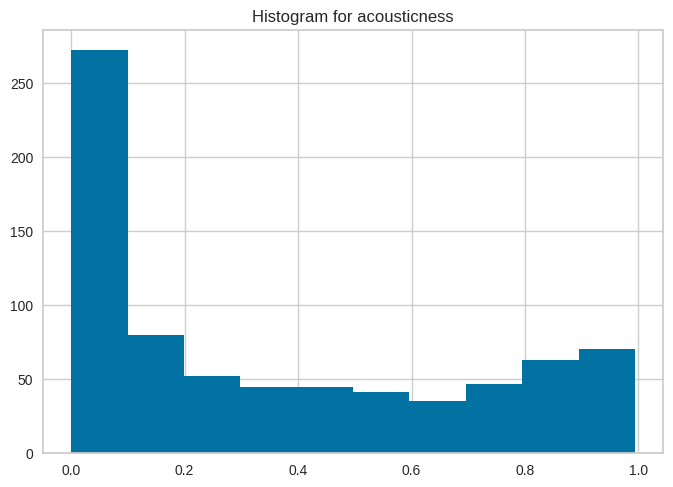

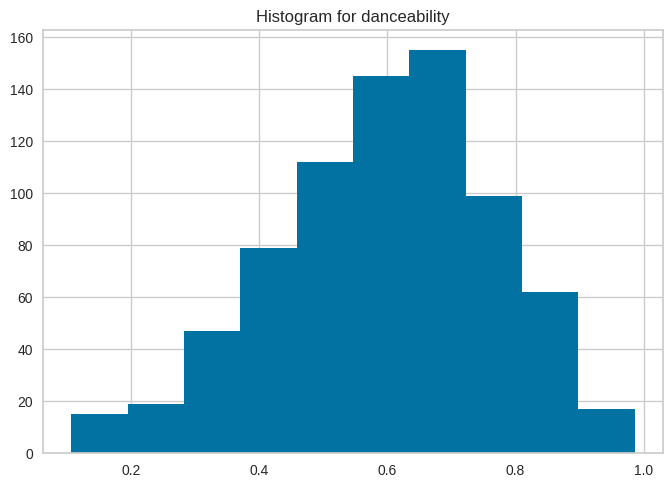

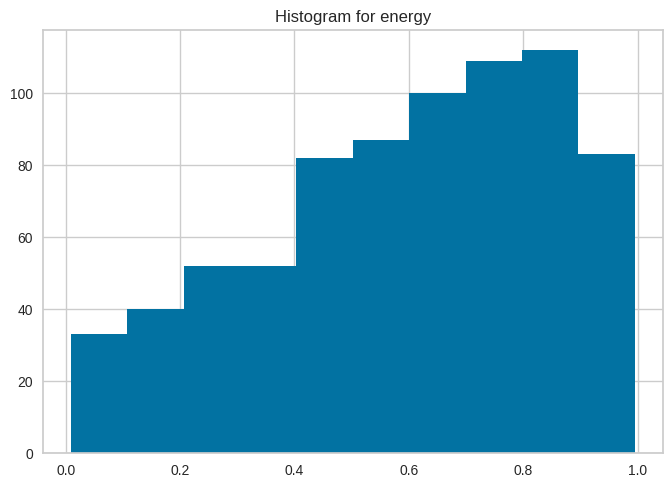

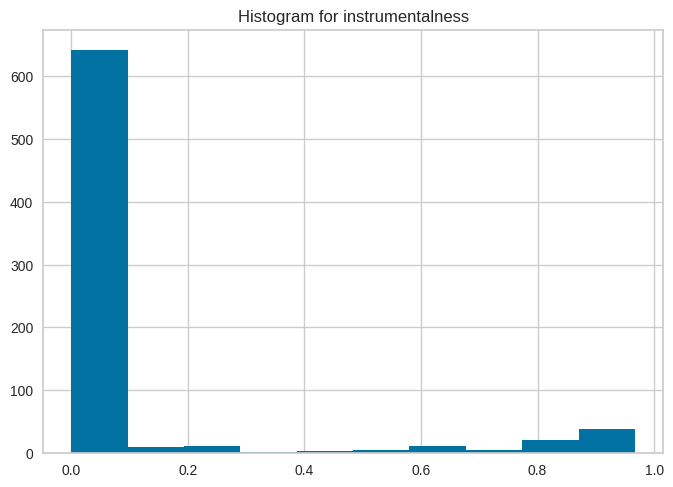

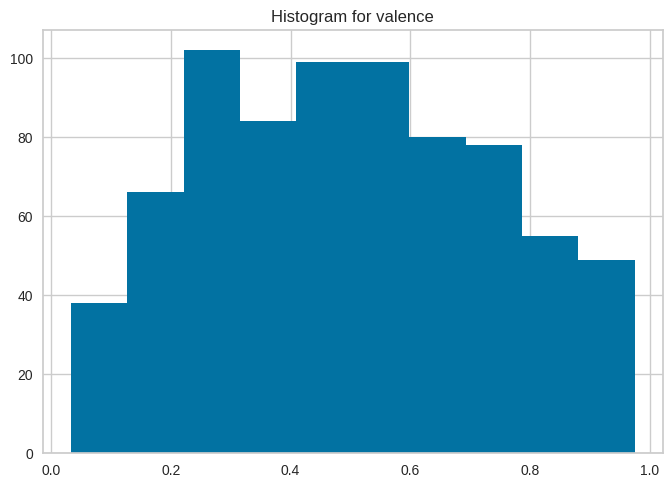

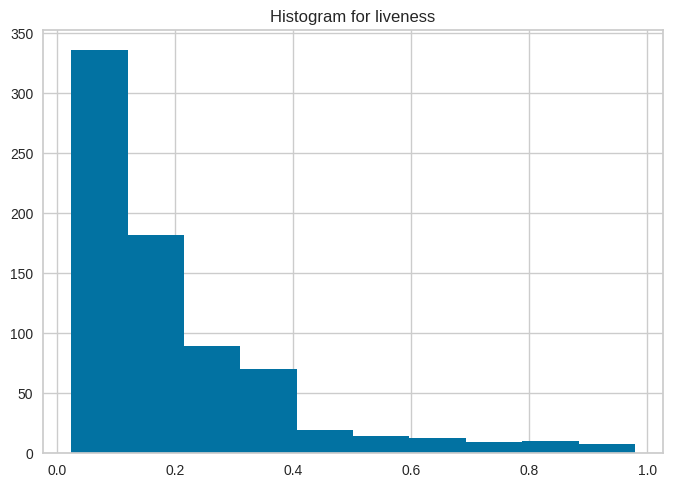

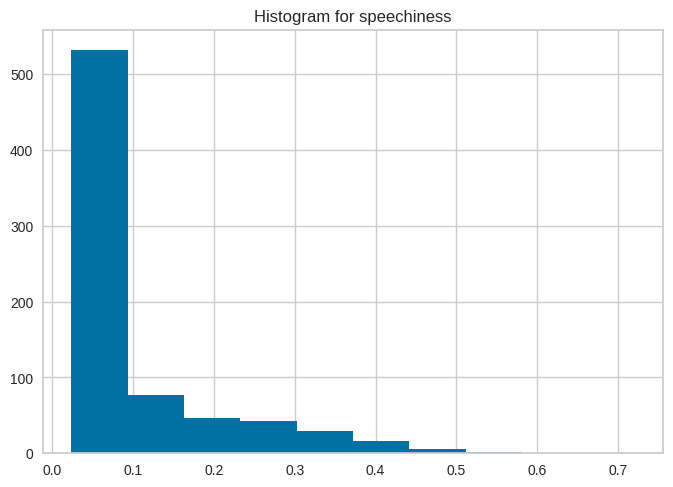

In [7]:
relative = ["acousticness", "danceability", "energy", "instrumentalness", "valence", "liveness", "speechiness"]

for key in relative:
    df[key].hist()
    plt.title(f"Histogram for {key}")
    plt.show()

Para las variables numericas se nota cierto sesgo en en varias de las variables. Esto indica necesario un trabajo para normalizar estas columnas en particular

#### Categoticas

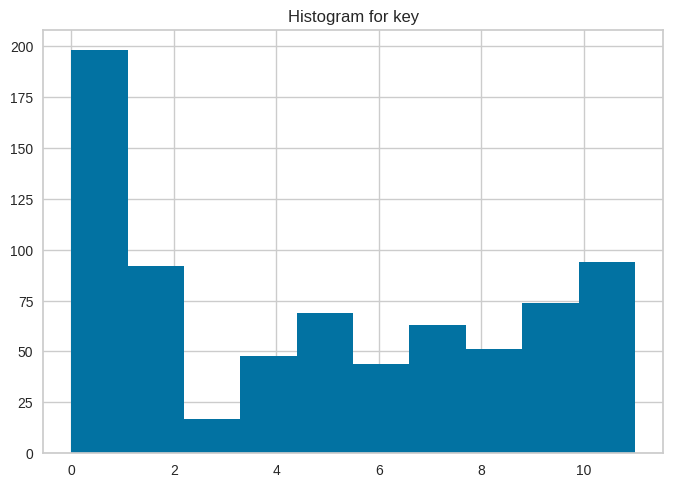

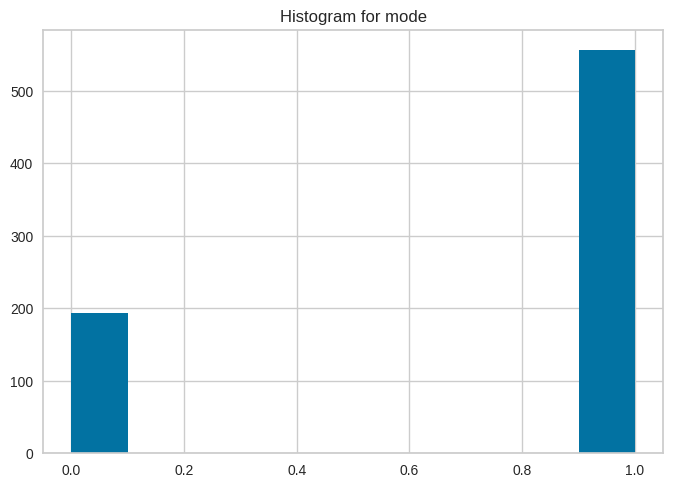

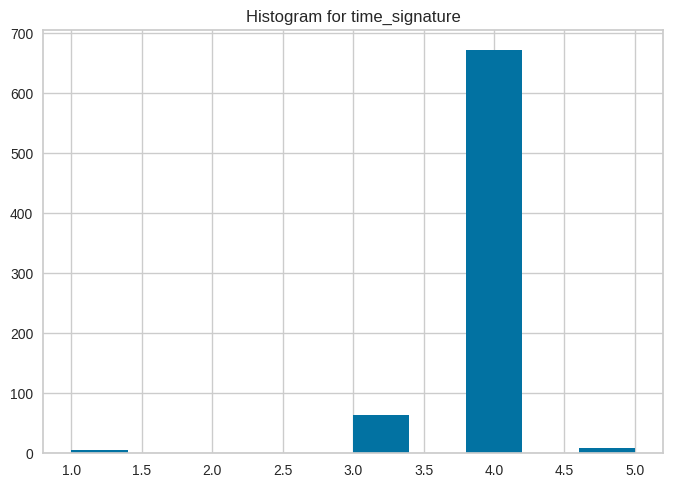

In [8]:
categorical = ["key", "mode", "time_signature"]

for key in categorical:
    df[key].hist()
    plt.title(f"Histogram for {key}")
    plt.show()

time signature esta particularmente desbalanceada por lo que requerira algun tipo de trabajo para sacar esto. Mode es una variable binaria y dentro de todo balanceada por lo que no requiere mucho trabajo especifico. Para key hay muchos valores diferentes pero no hay un approach obvio para atacar este problema para esta variable dado lo especifico de la informacion que transmite

#### Nominales

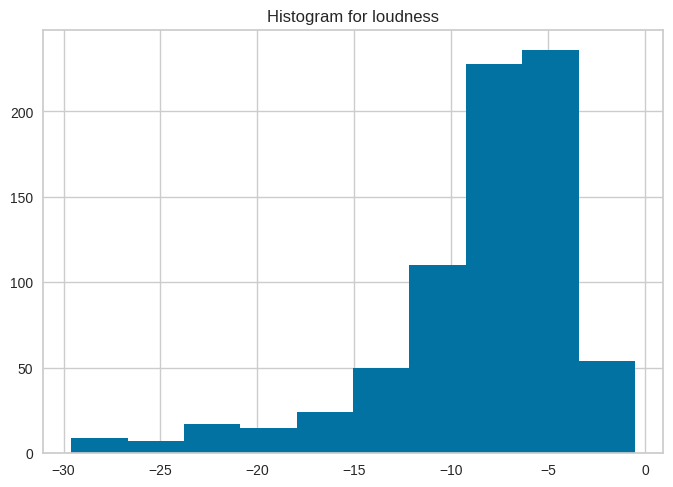

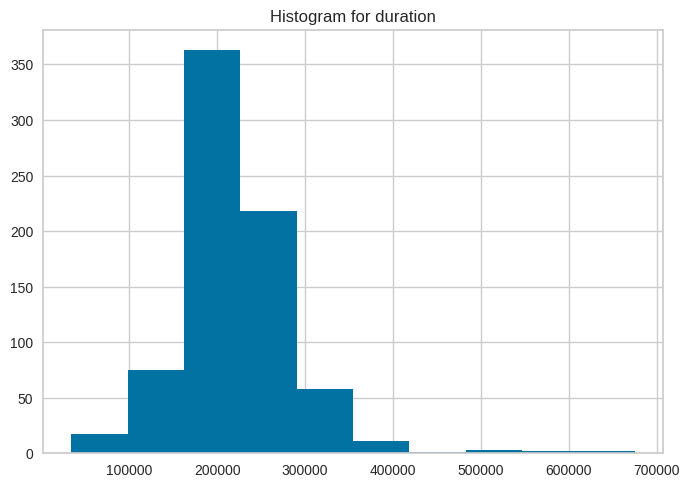

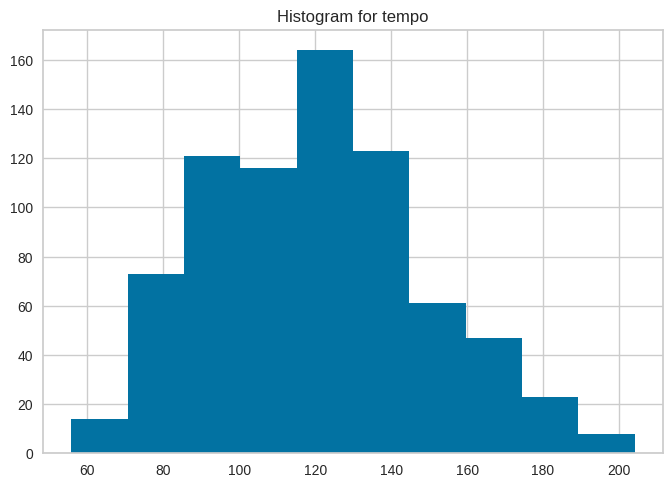

In [9]:
nominal = ["loudness", "duration", "tempo"]

for key in nominal:
    df[key].hist()
    plt.title(f"Histogram for {key}")
    plt.show()

Las tres variables estan claramente desbalanceadas y las tres podrian organizarse en bins para balancear las clases (por ejemplo, tempo podria dividirse en lento, medio y rapido. Duration tambien podria separase en corta, media y larga)

### Desvalance de la variable de salida

In [10]:
positive = df[df["label"] == 1]
negative = df[df["label"] == 0]

In [11]:
len(positive) / len(df)

0.6026666666666667

In [12]:
len(negative)/len(df)

0.3973333333333333

La relacion entre ejemplos de cada clase de 60/40 entre positivos y negativos. No es ideal pero es bastante parecido a 50/50

## Limpieza y preparacion de datos

### Valores nulos

In [13]:
df.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

No hay valores nulos por lo que no es necesario hacer un trabajo de imputacion de estos valores

Seria interesante entender si existe alguna fila que no tenga valores nulos pero tal vez una cantidad de valores igualados a cero que sea llamativa

In [14]:
df[df.eq(0).all(axis=1)]

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label


No hay filas que esten todas igualadas a cero por lo que tampoco se podria asumir que esten "vacias" aunque con valores

### Modificacion de columnas

#### Transformacion de tempo en una categoria

In [15]:
num_bins = 3  # Número de categorías deseadas
# labels = ['Short', 'Medium', 'Long']
labels = [1, 2, 3]
df['tempo_categorical'] = pd.qcut(df['tempo'], num_bins, labels=labels).astype(int)
df['tempo_categorical'].head(5)

0    2
1    2
2    3
3    2
4    1
Name: tempo_categorical, dtype: int64

#### Transformacion de duration en una categoria

In [16]:
num_bins = 3  # Número de categorías deseadas
# labels = ['Short', 'Medium', 'Long']
labels = [1, 2, 3]
df['duration_categorical'] = pd.qcut(df['duration'], num_bins, labels=labels).astype(int)
df['duration_categorical'].head(5)

0    1
1    2
2    2
3    1
4    1
Name: duration_categorical, dtype: int64

#### Transformacion de loudness en una categoria

In [17]:
num_bins = 3  # Número de categorías deseadas
# labels = ['Short', 'Medium', 'Long']
labels = [1, 2, 3]
df['loudness_categorical'] = pd.qcut(df['loudness'], num_bins, labels=labels).astype(int)
df['loudness_categorical'].head(5)

0    1
1    2
2    1
3    1
4    2
Name: loudness_categorical, dtype: int64

#### Transformacion de time signature en si es o no 4/4

In [18]:
valor_esperado = 4
df['is_4_by_4'] = df['time_signature'].apply(lambda x: x == valor_esperado).astype(int)

In [19]:
# df = df.drop(['duration', 'time_signature', 'tempo', 'loudness'], axis=1)
# df

Actualizamos el conjunto de variables que tenemos luego de esta transformacion

In [20]:
updated_categorical = ["key", "mode", "loudness_categorical", "duration_categorical", "is_4_by_4", "tempo_categorical"]

print(updated_categorical)
print(relative)

['key', 'mode', 'loudness_categorical', 'duration_categorical', 'is_4_by_4', 'tempo_categorical']
['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence', 'liveness', 'speechiness']


### Reescalar variables

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[relative])
df[relative] = scaled_values

scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[nominal])
df[nominal] = scaled_values



In [22]:
df[nominal].describe()

,loudness,duration,tempo
count,7.500000e+02,7.500000e+02,7.500000e+02
mean,2.936910e-16,-6.868580e-17,9.237056e-17
std,1.000667e+00,1.000667e+00,1.000667e+00
min,-4.188071e+00,-2.841952e+00,-2.279993e+00
25%,-3.304446e-01,-5.282331e-01,-7.548791e-01
50%,2.460896e-01,-7.634928e-02,-1.062306e-02
75%,6.774230e-01,3.680586e-01,6.230428e-01
max,1.583824e+00,6.945679e+00,2.953407e+00


In [23]:
df[relative].describe()

,acousticness,danceability,energy,instrumentalness,valence,liveness,speechiness
count,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02
mean,1.728987e-16,-3.789561e-17,1.113184e-16,1.894781e-17,-1.877017e-16,7.105427e-17,-1.160553e-16
std,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00
min,-1.056814e+00,-2.846870e+00,-2.310799e+00,-3.859309e-01,-1.938240e+00,-1.010626e+00,-7.221224e-01
25%,-9.469648e-01,-6.772774e-01,-6.752907e-01,-3.859309e-01,-8.365721e-01,-6.131389e-01,-6.026705e-01
50%,-3.338290e-01,5.561447e-02,1.474014e-01,-3.858916e-01,-5.980857e-02,-4.190437e-01,-4.798740e-01
75%,9.495127e-01,6.939865e-01,8.318259e-01,-3.772879e-01,7.816853e-01,3.457874e-01,1.341084e-01
max,1.882449e+00,2.265923e+00,1.583409e+00,3.336907e+00,1.994856e+00,4.369954e+00,5.944246e+00


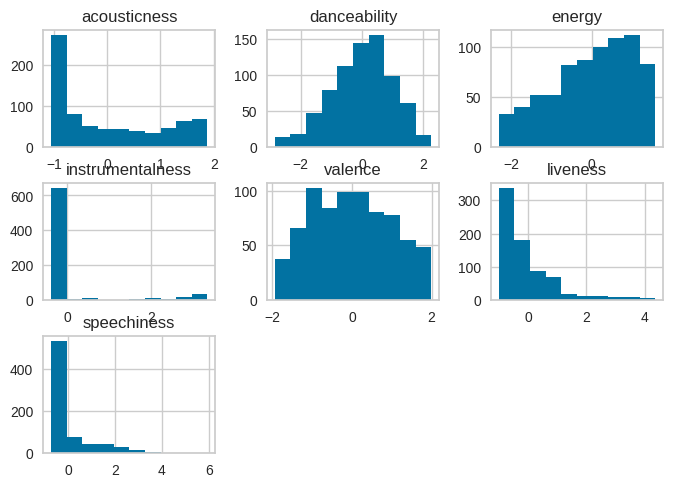

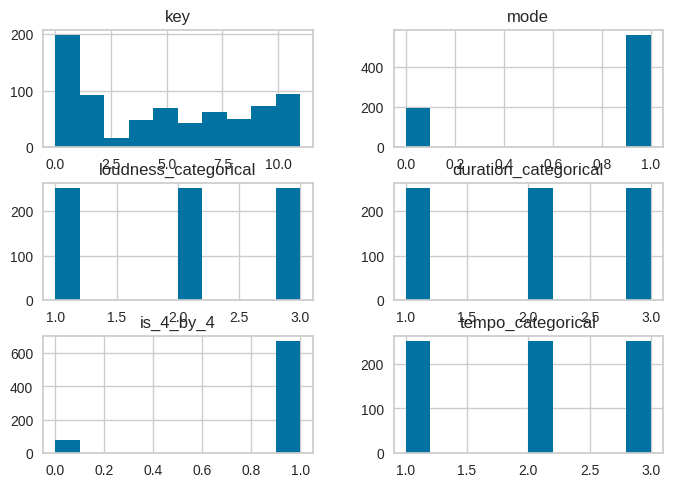

In [24]:
df[relative].hist()
plt.show()

df[updated_categorical].hist()
plt.show()

Se nota que las variables relativas estan muy sesgadas incluso despues de la normalizacion. Se aplica entonces un 

In [25]:
from sklearn.preprocessing import PowerTransformer

# Obtener los datos de la columna que se desea transformar
column_data = df[relative].values

# Crear una instancia de PowerTransformer con método 'yeo-johnson'
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

# Ajustar y transformar los datos
df[relative] = yeo_johnson_transformer.fit_transform(df[relative])

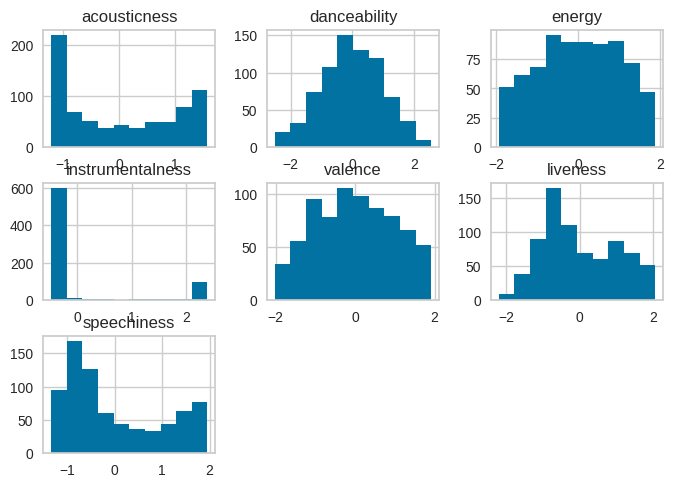

In [26]:
df[relative].hist()
plt.show()

El resultado no es muchisimo mejor pero claramente es mejor si se lo compara con la version anterior, especialmente a danceability, energy, liveness, speechiness, etc.

#### Informacion mutua

In [27]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop('label', axis=1)  # Eliminar la columna del target si está presente
y = df['label']

# Calcular la información mutua entre las variables y la variable objetivo
mutual_info = mutual_info_classif(X, y)

# Crear un DataFrame con la información mutua para cada variable
mutual_info_df = pd.DataFrame(mutual_info, index=X.columns, columns=['Mutual Information'])

# Ordenar los valores de información mutua de forma descendente
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

mutual_info_df

,Mutual Information
speechiness,0.155186
loudness,0.145381
energy,0.137488
acousticness,0.125522
loudness_categorical,0.104583
danceability,0.101036
tempo,0.064005
key,0.056314
mode,0.043561
liveness,0.035398


### PCA

In [28]:
from sklearn.decomposition import PCA
import seaborn as sns

# Separar las características del target (si aplica)
X = df.drop('label', axis=1)  # Eliminar la columna del target si está presente
X = X.drop(updated_categorical, axis=1)  # Eliminar la columna del target si está presente

# Crear una instancia de PCA
pca = PCA(n_components=3)  # Especificar el número de componentes principales deseados

# Ajustar el PCA a los datos escalados
X_pca = pca.fit_transform(X)

# Obtener las proporciones de varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Imprimir las proporciones de varianza explicada
print("Proporción de varianza explicada por cada componente:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Componente {i+1}: {ratio:.3f}")

# Obtener los nombres de columna asociados a cada componente principal
component_names = [f"Componente {i+1}" for i in range(pca.n_components_)]
feature_names = X.columns

# Crear un DataFrame que muestre las asociaciones entre las columnas originales y las componentes principales
component_df = pd.DataFrame(pca.components_, columns=feature_names, index=component_names)

component_df

Proporción de varianza explicada por cada componente:
Componente 1: 0.334
Componente 2: 0.128
Componente 3: 0.101


,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
Componente 1,0.426413,-0.332656,0.159178,-0.456255,0.253140,-0.128927,-0.464250,-0.261151,-0.143020,-0.053755,-0.293652
Componente 2,0.262207,0.454283,-0.459182,-0.300748,-0.126353,-0.427371,-0.180455,0.094525,-0.104530,-0.000124,0.415380
Componente 3,-0.225415,0.264939,0.521485,0.056405,0.190144,-0.700241,0.007865,0.130105,0.168363,0.029346,-0.176575


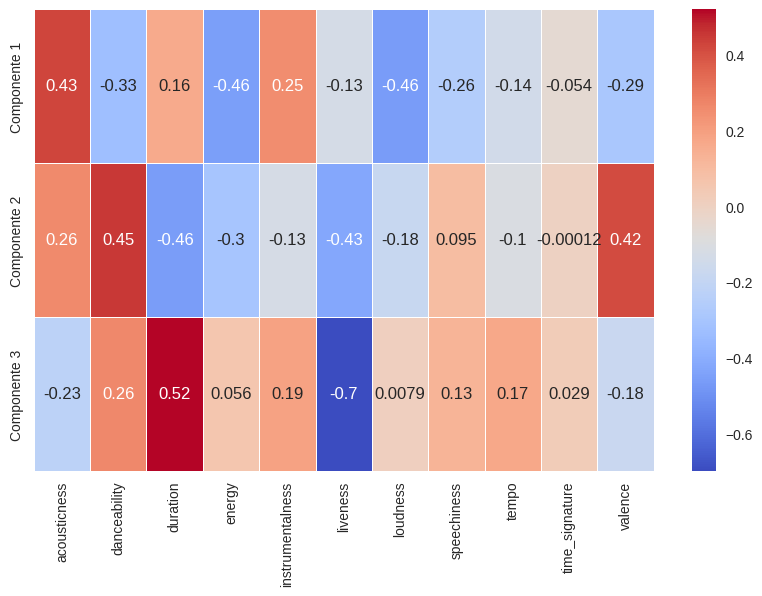

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(component_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

### Correlacion de variables

<Axes: >

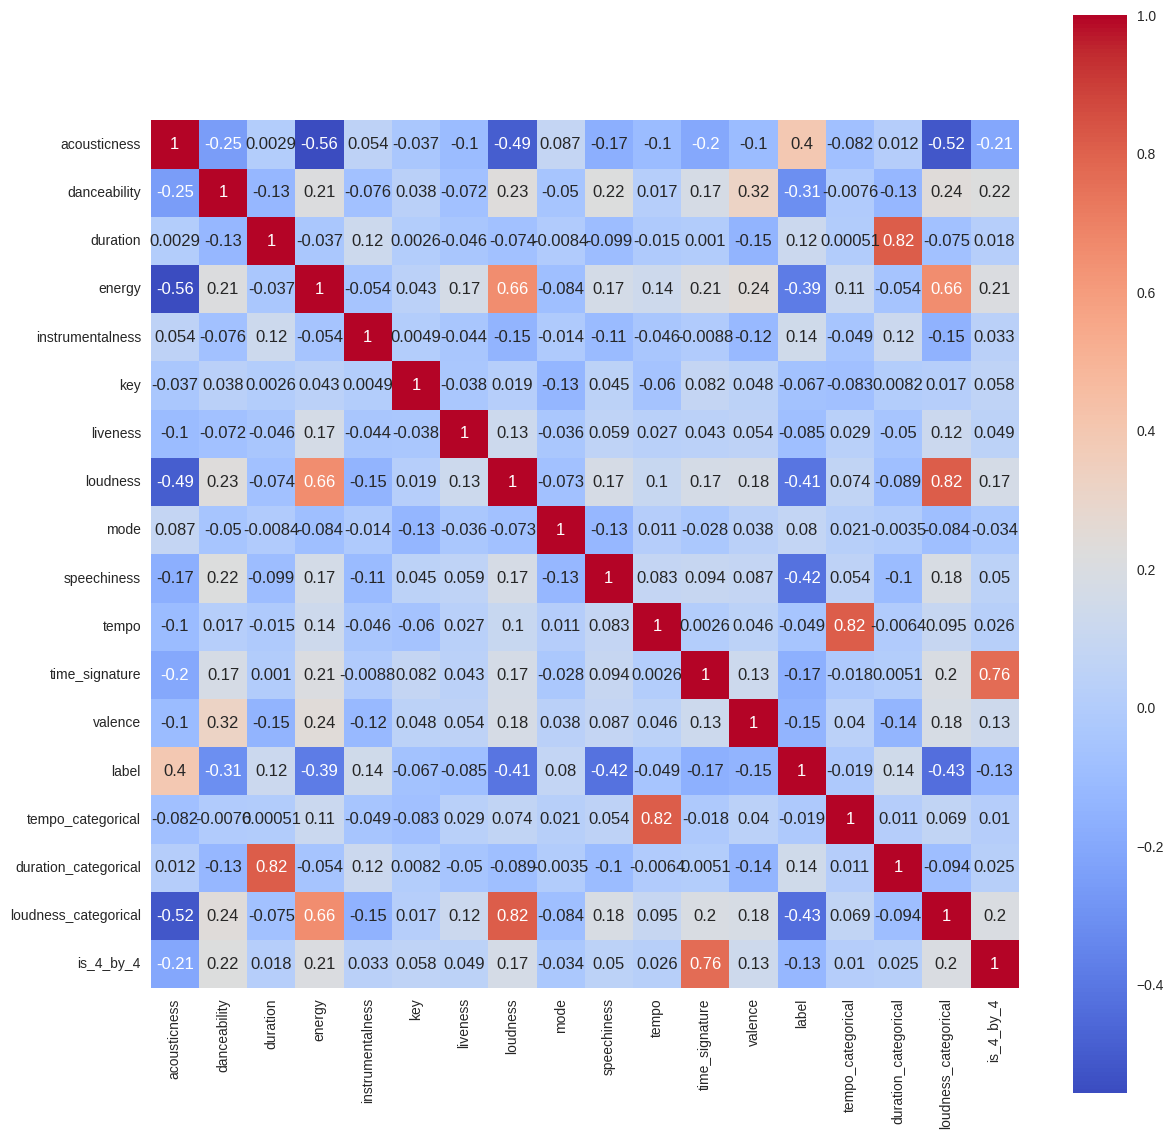

In [30]:
plt.figure(figsize=(14, 14))
correlation_matrix = df.corr(method='kendall')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Aprendizaje de Maquina

In [31]:
df

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label,tempo_categorical,duration_categorical,loudness_categorical,is_4_by_4
0,1.098436,-0.534666,-1.830645,-0.422480,2.387486,8,-0.492401,-1.256057,0,-0.529176,-0.018575,4,-1.519384,1,2,1,1,1
1,-0.340373,0.658512,-0.199770,-0.060324,-0.478777,4,0.923927,0.312609,1,-0.986896,0.125647,4,0.380856,1,2,2,2,1
2,0.174550,0.129285,-0.059696,-0.655227,-0.478632,5,-0.273956,-0.155012,1,-1.095327,0.688498,4,-1.266946,1,3,2,1,1
3,0.872393,1.302252,-1.277002,-1.378335,2.198124,5,0.384144,-0.495552,1,-0.580369,-0.368338,4,1.239321,1,2,1,1,1
4,1.398484,-0.795449,-0.590027,-0.641580,-0.471808,6,-1.228733,0.073934,0,-0.862871,-1.043710,4,-0.870568,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-1.212960,-1.258693,1.734932,1.575684,-0.472492,6,-0.301941,0.873953,0,-0.177473,-0.293441,4,-0.650813,0,2,3,3,1
746,-1.203933,-0.679495,-0.108519,1.156022,-0.245018,10,-0.734329,1.035784,0,-0.215605,1.397862,4,-0.368771,0,3,2,3,1
747,1.451986,-0.020668,-1.437901,-1.106293,-0.478777,0,1.288916,0.174408,1,-0.955437,0.625626,4,1.386831,1,3,1,2,1
748,-0.439067,0.567871,0.448253,0.923472,-0.477644,3,-0.344571,0.321147,1,-0.780379,0.834094,4,1.032043,1,3,3,2,1


In [32]:
# dummy
# decission tree
# random forest
# svm
# Clustering - no supervisado
# bagging and boosting
# usar la correlacion de kendall para reducir dimensionalidad
# el problema es de clasificacion
# buscamos maximizar precision

In [33]:
X = df.drop(['tempo_categorical', 'duration', 'loudness', 'label'], axis=1)
y = df['label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"x train: {X_train.shape}")
print(f"x test: {X_test.shape}")
print(f"y train: {y_train.shape}")
print(f"y test: {y_test.shape}")

x train: (600, 14)
x test: (150, 14)
y train: (600,)
y test: (150,)


### Dummy

In [34]:
from sklearn.base import BaseEstimator
from sklearn.metrics import precision_score

class DummyModel(BaseEstimator):
    def __init__(self, constant_value=1):
        self.constant_value = constant_value
    
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return [self.constant_value] * len(X)

    def score(self, X, y):
        predictions = self.predict(X)
        return precision_score(y, predictions)

In [35]:
model_1 = DummyModel(1)
model_1.fit(X_train, y_train)

In [36]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(model_1, X, y, cv=5, scoring='precision')
print(scores)
print(scores.mean())

[0.62666667 0.60666667 0.58666667 0.6        0.59333333]
0.6026666666666667


In [37]:
model_0 = DummyModel(0)
model_0.fit(X_train, y_train)

In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_0, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

[0. 0. 0. 0. 0.]
0.0


Hasta aca DummyModel que siempre devuelve 1 es nuestra linea de base, con el 60% de precision. Construiremos tratando de mejorar eso.

### Decission Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(dt, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

from sklearn.model_selection import GridSearchCV

# model = DecisionTreeClassifier(random_state=42)

# param_grid = {
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'max_depth': np.arange(1, 10, 1),
#     'min_samples_split': np.arange(2, 10, 1),
#     'min_samples_leaf': np.arange(1, 10, 1),
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(model, param_grid, cv=10, scoring='precision')
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# best_model_dt = grid_search.best_estimator_

best_model_dt = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=4, max_features='auto', min_samples_leaf=6, min_samples_split=2)

best_model_dt.fit(X_train, y_train)

precision = best_model_dt.score(X_test, y_test)
print("precision:", precision)

scores = cross_val_score(best_model_dt, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

[0.78846154 0.80487805 0.85       0.81632653 0.78431373 0.76470588
 0.81395349 0.82978723 0.78571429 0.79545455]
0.8033595279280886
precision: 0.7866666666666666
[0.7755102  0.93103448 0.87179487 0.78947368 0.79166667 0.73469388
 0.83333333 0.82222222 0.81818182 0.90243902]
0.8270350185190957


### RF

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_naive = RandomForestClassifier(random_state=2)

scores = cross_val_score(rf_naive, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

# rf = RandomForestClassifier(random_state=42)

# param_grid = {
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'n_estimators': np.arange(100, 400, 100),
#     'max_depth': np.arange(1, 5, 1),
#     'min_samples_split': np.arange(2, 5, 1),
#     'min_samples_leaf': np.arange(1, 2, 1),
#     'max_features': ['sqrt', 'log2']
# }

# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='precision')
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# best_model_rf = grid_search.best_estimator_

best_model_rf = RandomForestClassifier(random_state=42, criterion='gini', max_depth=4, max_features='sqrt', min_samples_leaf=1, min_samples_split=3, n_estimators=300)

best_model_rf.fit(X_train, y_train)

precision = best_model_rf.score(X_test, y_test)
print("precision:", precision)

scores = cross_val_score(best_model_rf, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

[0.82       0.86842105 0.89130435 0.8372093  0.84444444 0.84313725
 0.84444444 0.89795918 0.81818182 0.86956522]
0.853466706582069
precision: 0.84
[0.81132075 0.85365854 0.89583333 0.8        0.81632653 0.82352941
 0.83333333 0.87755102 0.79545455 0.95121951]
0.8458226978403796


Random Forest dio resultados que no mejoraron mucho mas los resultados obtenidos con Decision Tree, incluso haciendo varias pruebas con varios de los hiperparametros. Aun asi parece ser mas consistente con esos resultados por lo que vamos a quedarnos por ahora con 

### SVC

In [68]:
from sklearn.svm import SVC

svc = SVC(random_state=42, probability=True)

scores = cross_val_score(svc, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

# svc = SVC(random_state=42, probability=True)

# param_grid = {
#     'C': [0, 0.1, 1, 10, 100],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto'],
#     'degree': np.arange(1, 10, 1)
# }

# grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='precision')
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# best_model_svc = grid_search.best_estimator_

best_model_svc = SVC(random_state=42, C=10, degree=1, gamma='scale', kernel='linear', probability=True)

best_model_svc.fit(X_train, y_train)

precision = best_model_svc.score(X_test, y_test)
print("precision:", precision)

scores = cross_val_score(best_model_svc, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

[0.78571429 0.85106383 0.875      0.82222222 0.81632653 0.82
 0.80769231 0.89795918 0.82222222 0.92857143]
0.8426772010495414
precision: 0.82
[0.75925926 0.80434783 0.83673469 0.77083333 0.82608696 0.81132075
 0.8125     0.85714286 0.81818182 0.9047619 ]
0.8201169403882401


### AdaBoost

In [86]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)

ada.fit(X_train, y_train)

scores = cross_val_score(ada, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

[0.79591837 0.85365854 0.85106383 0.82222222 0.84444444 0.79245283
 0.85714286 0.8125     0.81395349 0.9       ]
0.8343356576089835


In [62]:

ada_dt = AdaBoostClassifier(random_state=42, estimator=best_model_dt)

ada_dt.fit(X_train, y_train)

scores = cross_val_score(ada_dt, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

[0.8        0.91891892 0.82978723 0.85714286 0.79591837 0.78
 0.85714286 0.82       0.81395349 0.83333333]
0.8306197056299551


In [63]:
ada_rf = AdaBoostClassifier(random_state=42, estimator=rf_naive)

ada_rf.fit(X_train, y_train)

scores = cross_val_score(ada_rf, X, y, cv=5, scoring='precision')
print(scores)
print(scores.mean())

[0.87209302 0.84782609 0.82653061 0.84375    0.84705882]
0.847451709197329


In [69]:
ada_svc = AdaBoostClassifier(random_state=42, estimator=best_model_svc)

ada_svc.fit(X_train, y_train)

scores = cross_val_score(ada_svc, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

[0.61333333 0.61333333 0.6        0.6        0.6        0.6
 0.6        0.6        0.6        0.6       ]
0.6026666666666666


### Minimal X

In [65]:
X = df[['speechiness', 'loudness', 'energy', 'acousticness', 'danceability']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"x train: {X_train.shape}")
print(f"x test: {X_test.shape}")
print(f"y train: {y_train.shape}")
print(f"y test: {y_test.shape}")

x train: (600, 5)
x test: (150, 5)
y train: (600,)
y test: (150,)


In [75]:
dt = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(dt, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

# model = DecisionTreeClassifier(random_state=42)

# param_grid = {
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'max_depth': np.arange(1, 10, 1),
#     'min_samples_split': np.arange(2, 10, 1),
#     'min_samples_leaf': np.arange(1, 10, 1),
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='precision')
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# best_model_dt_min = grid_search.best_estimator_

best_model_dt_min = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=2, max_features='auto', min_samples_leaf=1, min_samples_split=2)
best_model_dt_min.fit(X_train, y_train)

precision = best_model_dt_min.score(X_test, y_test)
print("precision:", precision)

scores = cross_val_score(best_model_dt_min, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

[0.76666667 0.85227273 0.83516484 0.78571429 0.8372093 ]
0.8154055634288193
precision: 0.76
[0.84507042 0.89393939 0.85185185 0.71428571 0.90625   ]
0.8422794765224342


In [76]:
rf = RandomForestClassifier(random_state=2)

scores = cross_val_score(rf, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

# rf = RandomForestClassifier(random_state=42)

# param_grid = {
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'n_estimators': np.arange(100, 400, 100),
#     'max_depth': np.arange(1, 5, 1),
#     'min_samples_split': np.arange(2, 5, 1),
#     'min_samples_leaf': np.arange(1, 2, 1),
#     'max_features': ['sqrt', 'log2']
# }

# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='precision')
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# best_model = grid_search.best_estimator_
best_model_rf_min = RandomForestClassifier(random_state=42, criterion='gini', max_depth=4, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=300)

best_model_rf_min.fit(X_train, y_train)

precision = best_model_rf_min.score(X_test, y_test)
print("precision:", precision)

scores = cross_val_score(best_model_rf_min, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

[0.85555556 0.88764045 0.81818182 0.875      0.85393258]
0.8580620814890478
precision: 0.84
[0.82653061 0.87640449 0.82653061 0.86458333 0.88372093]
0.855553996487542


In [83]:
from sklearn.svm import SVC

svc = SVC(random_state=42, probability=True)

scores = cross_val_score(svc, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

# svc = SVC(random_state=42)

# param_grid = {
#     'C': [0, 0.1, 1, 10, 100],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto'],
#     'degree': np.arange(1, 10, 1)
# }

# grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='precision', probability=True)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# best_model = grid_search.best_estimator_
best_model_svc_min = SVC(random_state=42, C=10, degree=1, gamma='scale', kernel='rbf', probability=True)
best_model_svc_min.fit(X_train,y_train)

precision = best_model_svc_min.score(X_test, y_test)
print("precision:", precision)

scores = cross_val_score(best_model_svc_min, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

[0.82       0.84946237 0.81       0.84158416 0.88095238]
0.8403997809919239
precision: 0.84
[0.82653061 0.85714286 0.83673469 0.85       0.87356322]
0.8487942763312221


In [85]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)

ada.fit(X_train, y_train)

scores = cross_val_score(ada, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

[0.79591837 0.85365854 0.85106383 0.82222222 0.84444444 0.79245283
 0.85714286 0.8125     0.81395349 0.9       ]
0.8343356576089835


In [78]:
ada_dt_minimal = AdaBoostClassifier(random_state=42, estimator=best_model_dt_min)

ada_dt_minimal.fit(X_train, y_train)

scores = cross_val_score(ada_dt_minimal, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

[0.76       0.84090909 0.86363636 0.7804878  0.81395349 0.82
 0.79591837 0.76363636 0.81818182 0.84782609]
0.810454938391724


In [79]:
ada_rf_minimal = AdaBoostClassifier(random_state=42, estimator=best_model_rf_min)

ada_rf_minimal.fit(X_train, y_train)

scores = cross_val_score(ada_rf_minimal, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

[0.80769231 0.86046512 0.875      0.86666667 0.82608696 0.86
 0.80434783 0.85714286 0.86046512 0.90909091]
0.8526957755759575


In [84]:
ada_svc_minimal = AdaBoostClassifier(random_state=42, estimator=best_model_svc_min)

ada_svc_minimal.fit(X_train, y_train)

scores = cross_val_score(ada_svc_minimal, X, y, cv=10, scoring='precision')
print(scores)
print(scores.mean())

[0.61333333 0.61333333 0.60810811 0.60810811 0.6        0.7962963
 0.8372093  0.80392157 0.80952381 0.8372093 ]
0.7127043161981602


In [108]:
from pycaret.classification import *
setup(df, target='label', session_id=1)
best_model = compare_models(sort="Precision")
tuned_model = tune_model(best_model, optimize="Precision")
ensembled_model = ensemble_model(tuned_model)

,Description,Value
0,Session id,1
1,Target,label
2,Target type,Binary
3,Original data shape,"(750, 18)"
4,Transformed data shape,"(750, 18)"
5,Transformed train set shape,"(525, 18)"
6,Transformed test set shape,"(225, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8381,0.9118,0.8515,0.8776,0.8625,0.6656,0.6703,0.0500
qda,Quadratic Discriminant Analysis,0.7468,0.8586,0.6807,0.8729,0.7629,0.5001,0.5199,0.0330
nb,Naive Bayes,0.7296,0.8403,0.6554,0.8680,0.7424,0.4692,0.4944,0.0300
et,Extra Trees Classifier,0.8380,0.9141,0.8734,0.8620,0.8661,0.6609,0.6648,0.0520
gbc,Gradient Boosting Classifier,0.8344,0.9083,0.8736,0.8567,0.8635,0.6526,0.6566,0.0390
lightgbm,Light Gradient Boosting Machine,0.8246,0.9038,0.8700,0.8450,0.8560,0.6310,0.6342,0.0420
ridge,Ridge Classifier,0.8077,0.0000,0.8420,0.8428,0.8411,0.5973,0.6005,0.0280
lda,Linear Discriminant Analysis,0.8077,0.8844,0.8420,0.8428,0.8411,0.5973,0.6005,0.0310
svm,SVM - Linear Kernel,0.7430,0.0000,0.7574,0.8404,0.7669,0.4737,0.5112,0.0320
lr,Logistic Regression,0.7925,0.8834,0.8356,0.8245,0.8292,0.5647,0.5666,0.0350


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8113,0.9092,0.7812,0.8929,0.8333,0.6182,0.6255
1,0.8679,0.9077,0.8438,0.9310,0.8852,0.7306,0.7355
2,0.8113,0.9301,0.7188,0.9583,0.8214,0.6299,0.6595
3,0.7736,0.8393,0.7500,0.8571,0.8000,0.5418,0.5482
4,0.7547,0.8542,0.6562,0.9130,0.7636,0.5225,0.5536
5,0.8269,0.9141,0.7500,0.9600,0.8421,0.6569,0.6816
6,0.8077,0.8971,0.8710,0.8182,0.8438,0.5944,0.5963
7,0.8077,0.8556,0.8387,0.8387,0.8387,0.6006,0.6006
8,0.8269,0.8802,0.8387,0.8667,0.8525,0.6433,0.6438


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7925,0.9107,0.7500,0.8889,0.8136,0.5833,0.5940
1,0.8113,0.9077,0.8125,0.8667,0.8387,0.6120,0.6139
2,0.7925,0.9315,0.7188,0.9200,0.8070,0.5897,0.6109
3,0.7547,0.8408,0.7500,0.8276,0.7869,0.4996,0.5030
4,0.7358,0.8363,0.6562,0.8750,0.7500,0.4818,0.5045
5,0.8269,0.9266,0.7500,0.9600,0.8421,0.6569,0.6816
6,0.7500,0.8817,0.8065,0.7812,0.7937,0.4768,0.4772
7,0.7885,0.8725,0.8387,0.8125,0.8254,0.5573,0.5577
8,0.8077,0.8771,0.8387,0.8387,0.8387,0.6006,0.6006


In [109]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [110]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [111]:
evaluate_model(ensembled_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…